### Exploratory Analysis of Geolocational Data
Project Description :- 
Experience a day in the life of a Data Scientist/Engineer by doing a full-fledged analysis of
real-life data. Fetch, Clean, Analyse and run K Means Clustering on Geolocational data to
recommend accommodations to immigrants to a city!

In [1]:
# Making the import
import numpy as np
import pandas as pd

In [2]:
# read dataset
data= pd.read_csv(r'C:\Users\Soumya\Downloads\food_coded.csv')
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


### Data Cleaning

In [3]:
print(data.columns)

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [4]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus',
        'pay_meal_out','sports','veggies_day']

In [5]:
data=data[column]

In [6]:
data.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


### Data Exploration and Visualisation

In [7]:
import seaborn as sns
sns.pairplot(data)

C:\Users\Soumya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Soumya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


### Boxplot of Dataset

[Text(0, 0, 'cook'),
 Text(0, 0, 'eating_out'),
 Text(0, 0, 'employment'),
 Text(0, 0, 'ethnic_food'),
 Text(0, 0, 'exercise'),
 Text(0, 0, 'fruit_day'),
 Text(0, 0, 'income'),
 Text(0, 0, 'on_off_campus'),
 Text(0, 0, 'pay_meal_out'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'veggies_day')]

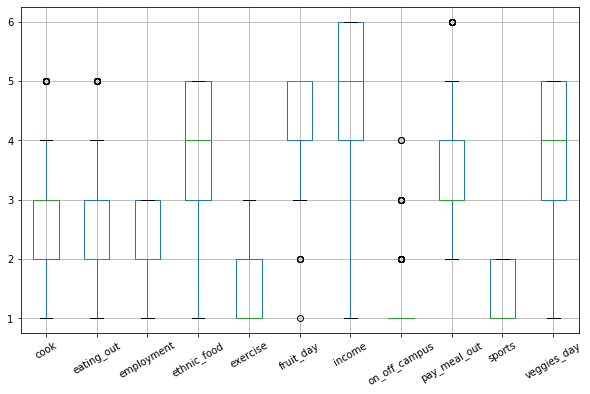

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
x=data.boxplot(figsize=(10,6))
x.set_xticklabels(x.get_xticklabels(),rotation=30)

In [9]:
data.shape

(125, 11)

In [10]:
p=data.dropna()

### Running KMeans Clustering on the data

In [11]:
## for machine learning
from sklearn import preprocessing, cluster
import scipy

In [12]:
f=['cook','income']
A = p[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(A) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(A)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

C:\Users\Soumya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


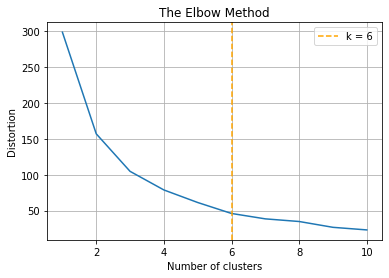

In [13]:
## plot
fig, x = plt.subplots()
x.plot(range(1, len(distortions)+1), distortions)
x.axvline(k, ls='--', color="orange", label="k = "+str(k))
x.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
x.legend()
x.grid(True)
plt.show()

### Get Geolocational Data

In [14]:
## for geospatial
!pip install folium
import folium
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import requests

In [15]:
!pip install geopy
import geopy

In [16]:
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    13.133521,77.567135,
    30000, 
    LIMIT)

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '62ec0b8be3de3e00fd98cb2e'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '13.133521,77.567135', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 161,
  'suggestedBounds': {'ne': {'lat': 13.40352127000027,
    'lng': 77.84386964188008},
   'sw': {'lat': 12.86352072999973, 'lng': 77.29040035811991}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reason

In [20]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

In [21]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,...,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,...,India,[40/1 Century Corbel Commercial (Sahakarnagar)...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,...,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,...,India,"[Chandrappa Complex (New BEL Road), Bangalore ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN
4,e-0-4db972aba86ee4fa7d37df76-4,0,"[{'summary': 'This spot is popular', 'type': '...",4db972aba86ee4fa7d37df76,Sheraton Bangalore Hotel,13.012513,77.555255,"[{'label': 'display', 'lat': 13.0125129, 'lng'...",13531,IN,...,India,"[26/1 Dr. Rajkumar Road, Malleswaram-Rajajinag...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],"26/1 Dr. Rajkumar Road, Malleswaram-Rajajinagar",NaN,560055,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-504ca0d6e4b01b58f44fca09-95,0,"[{'summary': 'This spot is popular', 'type': '...",504ca0d6e4b01b58f44fca09,Cafe Noir,13.011400,77.555295,"[{'label': 'display', 'lat': 13.01139977289809...",13654,IN,...,India,"[Brigade Gateway, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],Brigade Gateway,NaN,NaN,NaN,NaN
96,e-0-4fa2428fe4b0489ba36c89e5-96,0,"[{'summary': 'This spot is popular', 'type': '...",4fa2428fe4b0489ba36c89e5,1947,12.982885,77.548809,"[{'label': 'display', 'lat': 12.98288459195230...",16886,IN,...,India,"[West of Card Road (Rajajinagar), Bangalore, K...","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],West of Card Road,Rajajinagar,NaN,NaN,NaN
97,e-0-4cbaecb74c60a093faee48ca-97,0,"[{'summary': 'This spot is popular', 'type': '...",4cbaecb74c60a093faee48ca,Albek,12.996487,77.561502,"[{'label': 'display', 'lat': 12.99648738497878...",15266,IN,...,India,[Beside HarishChandra Ghat (At Mahakavi Kuvemp...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Beside HarishChandra Ghat,At Mahakavi Kuvempu Road,NaN,NaN,NaN
98,e-0-52dadd54498e74fef02e8b6c-98,0,"[{'summary': 'This spot is popular', 'type': '...",52dadd54498e74fef02e8b6c,Starbucks,13.011157,77.555101,"[{'label': 'display', 'lat': 13.01115650658322...",13683,IN,...,India,"[Ground Floor, Orion Mall, Bangalore 560055, K...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],"Ground Floor, Orion Mall",NaN,560055,Subramanya Nagar,NaN


### Adding two more Columns Restaurant and Others
Restaurant: Number of Restaurant in the radius of 20 km
& others:Number of Gyms, Parks,etc in the radius of 20 km

In [41]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,...,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,restaurant,others
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,...,"[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,2,4
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN,18,10
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,...,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,37,32
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN,14,10
4,e-0-4db972aba86ee4fa7d37df76-4,0,"[{'summary': 'This spot is popular', 'type': '...",4db972aba86ee4fa7d37df76,Sheraton Bangalore Hotel,13.012513,77.555255,"[{'label': 'display', 'lat': 13.0125129, 'lng'...",13531,IN,...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],"26/1 Dr. Rajkumar Road, Malleswaram-Rajajinagar",NaN,560055,NaN,NaN,33,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-504ca0d6e4b01b58f44fca09-95,0,"[{'summary': 'This spot is popular', 'type': '...",504ca0d6e4b01b58f44fca09,Cafe Noir,13.011400,77.555295,"[{'label': 'display', 'lat': 13.01139977289809...",13654,IN,...,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],Brigade Gateway,NaN,NaN,NaN,NaN,36,32
96,e-0-4fa2428fe4b0489ba36c89e5-96,0,"[{'summary': 'This spot is popular', 'type': '...",4fa2428fe4b0489ba36c89e5,1947,12.982885,77.548809,"[{'label': 'display', 'lat': 12.98288459195230...",16886,IN,...,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],West of Card Road,Rajajinagar,NaN,NaN,NaN,17,9
97,e-0-4cbaecb74c60a093faee48ca-97,0,"[{'summary': 'This spot is popular', 'type': '...",4cbaecb74c60a093faee48ca,Albek,12.996487,77.561502,"[{'label': 'display', 'lat': 12.99648738497878...",15266,IN,...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Beside HarishChandra Ghat,At Mahakavi Kuvempu Road,NaN,NaN,NaN,17,2
98,e-0-52dadd54498e74fef02e8b6c-98,0,"[{'summary': 'This spot is popular', 'type': '...",52dadd54498e74fef02e8b6c,Starbucks,13.011157,77.555101,"[{'label': 'display', 'lat': 13.01115650658322...",13683,IN,...,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],"Ground Floor, Orion Mall",NaN,560055,Subramanya Nagar,NaN,39,32


In [42]:
# Changing the Column Name
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

In [24]:
!pip install minisom

C:\Users\Soumya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


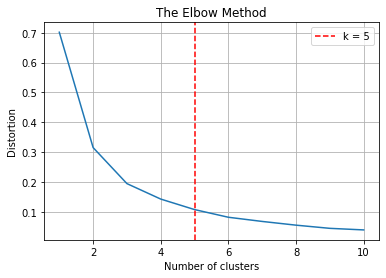

In [25]:
f=['venue.location.lat','venue.location.lng']
A = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(A) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(A)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [26]:
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]: [12.9767936, 77.590082]


In [27]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,...,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,restaurant,others
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,...,"[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,2,4
1,e-0-582f4eadfb549a1ff5a23b0a-1,0,"[{'summary': 'This spot is popular', 'type': '...",582f4eadfb549a1ff5a23b0a,The Druid Garden,13.063946,77.591492,"[{'label': 'display', 'lat': 13.06394560121628...",8182,IN,...,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",0,[],40/1 Century Corbel Commercial,Sahakarnagar,NaN,NaN,NaN,18,10
2,e-0-4f1869c7e4b0ebf9e4ae9134-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,...,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,37,32
3,e-0-4d52ba92d7eaa1437dee810f-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d52ba92d7eaa1437dee810f,Kanti Sweets,13.039038,77.564354,"[{'label': 'display', 'lat': 13.03903794158175...",10522,IN,...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Chandrappa Complex,New BEL Road,560054,NaN,NaN,14,10
4,e-0-4db972aba86ee4fa7d37df76-4,0,"[{'summary': 'This spot is popular', 'type': '...",4db972aba86ee4fa7d37df76,Sheraton Bangalore Hotel,13.012513,77.555255,"[{'label': 'display', 'lat': 13.0125129, 'lng'...",13531,IN,...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],"26/1 Dr. Rajkumar Road, Malleswaram-Rajajinagar",NaN,560055,NaN,NaN,33,31


In [28]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.address', 'venue.location.crossStreet',
       'venue.location.postalCode', 'venue.location.neighborhood',
       'venue.venuePage.id', 'restaurant', 'others'],
      dtype='object')

In [29]:
## Data Cleaning Process for Extracting Necessary Columns in the Dataset
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [30]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

### New Dataset

In [31]:
n.head()

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",2,4
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,18,10
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",37,32
3,13.039038,77.564354,"[Chandrappa Complex (New BEL Road), Bangalore ...",14,10
4,13.012513,77.555255,"[26/1 Dr. Rajkumar Road, Malleswaram-Rajajinag...",33,31


In [32]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n.head()

,lat,long,venue.location.formattedAddress,restaurant,others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",2,4
1,13.063946,77.591492,[40/1 Century Corbel Commercial (Sahakarnagar)...,18,10
2,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",37,32
3,13.039038,77.564354,"[Chandrappa Complex (New BEL Road), Bangalore ...",14,10
4,13.012513,77.555255,"[26/1 Dr. Rajkumar Road, Malleswaram-Rajajinag...",33,31


In [33]:
n['venue.location.formattedAddress']

0                         [Bangalore, Karnātaka, India]
1     [40/1 Century Corbel Commercial (Sahakarnagar)...
2     [#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...
3     [Chandrappa Complex (New BEL Road), Bangalore ...
4     [26/1 Dr. Rajkumar Road, Malleswaram-Rajajinag...
                            ...                        
95       [Brigade Gateway, Bangalore, Karnātaka, India]
96    [West of Card Road (Rajajinagar), Bangalore, K...
97    [Beside HarishChandra Ghat (At Mahakavi Kuvemp...
98    [Ground Floor, Orion Mall, Bangalore 560055, K...
99    [#1666, HSR layout (Sector 2, HSR Layout, 27th...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [34]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

In [35]:
n.head()

,lat,long,venue.location.formattedAddress,restaurant,others
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",2,4
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,18,10
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",37,32
3,13.039038,77.564354,"'Chandrappa Complex (New BEL Road)', 'Bangalo...",14,10
4,13.012513,77.555255,"'26/1 Dr. Rajkumar Road, Malleswaram-Rajajina...",33,31


In [36]:
## Plot the clustered locations on a map
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

C:\Users\Soumya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


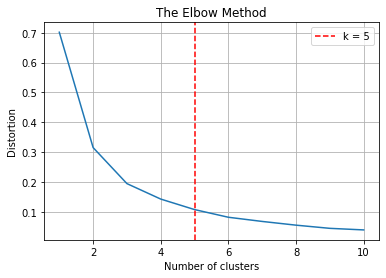

In [37]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [38]:
k = 5
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

C:\Users\Soumya\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",2,4,0,0
1,13.063946,77.591492,'40/1 Century Corbel Commercial (Sahakarnagar...,18,10,3,0
2,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",37,32,3,0
3,13.039038,77.564354,"'Chandrappa Complex (New BEL Road)', 'Bangalo...",14,10,3,0
4,13.012513,77.555255,"'26/1 Dr. Rajkumar Road, Malleswaram-Rajajina...",33,31,3,0
...,...,...,...,...,...,...,...
95,13.011400,77.555295,"'Brigade Gateway', 'Bangalore', 'Karnātaka', ...",36,32,3,0
96,12.982885,77.548809,"'West of Card Road (Rajajinagar)', 'Bangalore...",17,9,3,0
97,12.996487,77.561502,'Beside HarishChandra Ghat (At Mahakavi Kuvem...,17,2,3,0
98,13.011157,77.555101,"'Ground Floor, Orion Mall', 'Bangalore 560055...",39,32,3,0


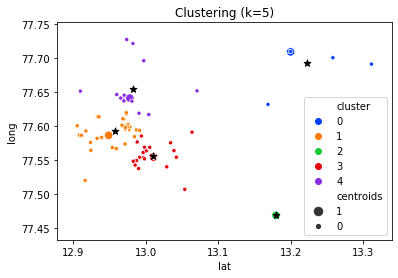

In [39]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="*")

Text(0.5, 1.0, 'Clustering (k=5)')

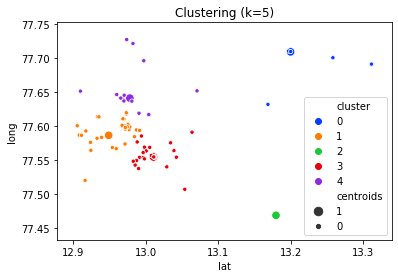

In [46]:
model = cluster.AffinityPropagation()
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

### Plot the clustered locations on a map

In [47]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_